In [1]:
import json 
from style import *

metric2title = {
    "brier": "Brier",
    "ECE": "ECE",
    "width_mean": "Mean set size",
    "post_train_log_likelihood": "Log Lik.",
    "post_log_marglik": "Log Marg. Lik.",
    "predictive_ll": "NLL"
}

## Plot grid search results


In [ ]:
with open('../../results/modelnet40/frequentist/plain.json') as f:
    plain = json.load(f)

with open('../../results/modelnet40/frequentist/augment.json') as f:
    augment = json.load(f)

with open('../../results/modelnet40/frequentist/invariant.json') as f:
    invariant = json.load(f)

with open('../../results/modelnet40/frequentist/equivariant.json') as f:
    equivariant = json.load(f)


with open('../../results/modelnet40/mll/plain.json') as f:
    plain_ll = json.load(f)

with open('../../results/modelnet40/mll/augment.json') as f:
    augment_ll = json.load(f)

with open('../../results/modelnet40/mll/invariant.json') as f:
    invariant_ll = json.load(f)

with open('../../results/modelnet40/mll/equivariant.json') as f:
    equivariant_ll = json.load(f)


/tmp/ipykernel_240483/3997028878.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(metric, width, c=colors[color_idx], s=scatter_size, label=label)


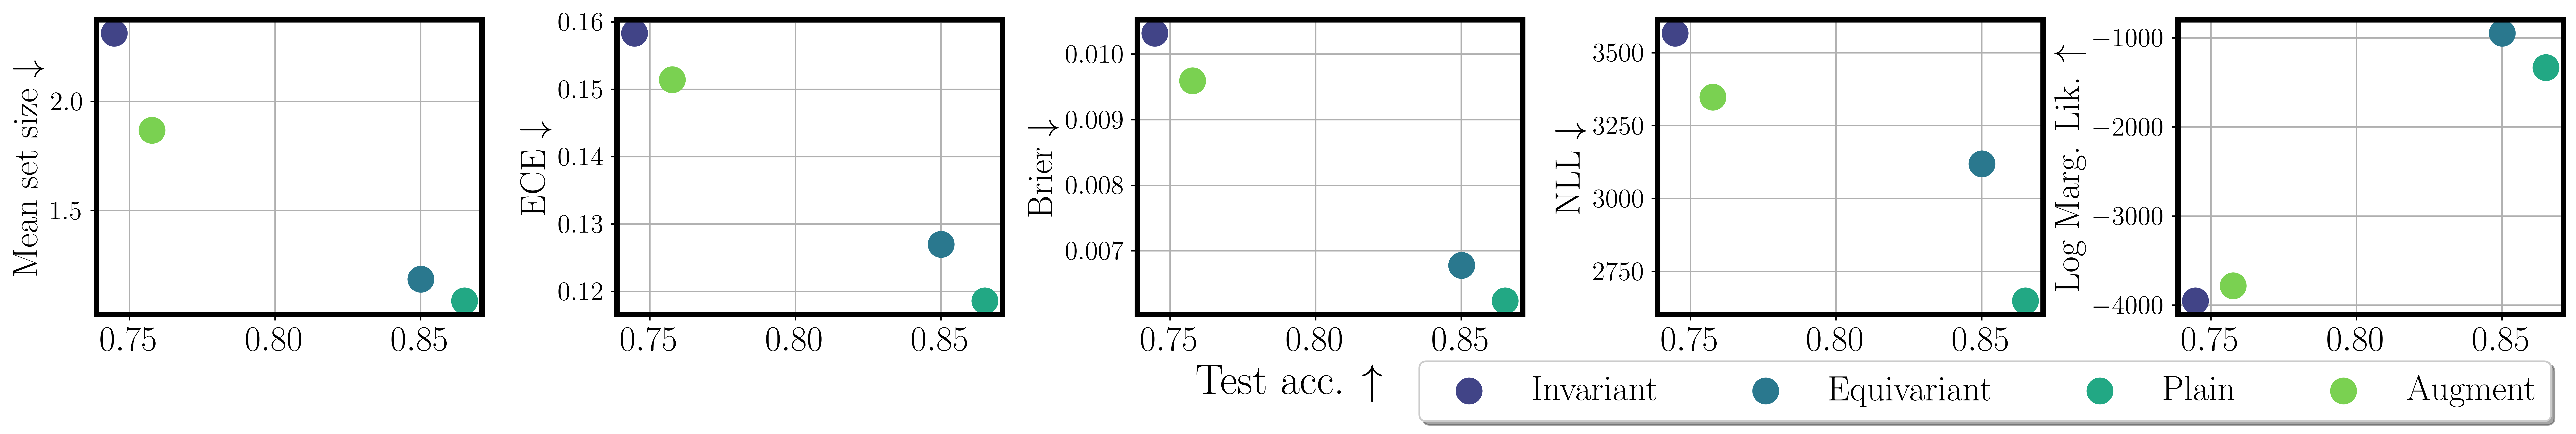

In [ ]:
def plot_single_curve(data, ax, metric_key, color_idx, scatter_size, label):
    
    if metric_key == "predictive_ll":
        width = [ - data[metric_key]]
        metric = [data["test_acc"]], 
    elif "marglik" in metric_key:
        metric, width = [data["acc"]["test"]], [data[metric_key]]
    else:        
        metric, width = [data["test_acc"]], [data[metric_key]]
    

    # ax[i].plot([metric[0], metric[0]], [width[0] - std, width[0] + std], c=colors[0], alpha=0.5)

    ax.scatter(metric, width, c=colors[color_idx], s=scatter_size, label=label)


def plot_metric(freq_models, ll_models, scatter_size=200, fontsize=20):
    metrics = ["width_mean", "ECE", "brier", "predictive_ll"]

    fig, ax = plt.subplots(1, len(metrics)+1, figsize=(5*(len(metrics)+1),3), dpi=600)
    fig.subplots_adjust(wspace=0.35)

    for i, metric_key in enumerate(metrics):
        c = 0
        for model_name, model_data in freq_models.items():
            plot_single_curve(model_data, ax[i], metric_key, c, scatter_size, model_name)
            c += 1
        # plot_single_curve(invariant, ax[i], metric_key, 0, scatter_size, "Invariant")
        
        # plot_single_curve(equivariant, ax[i], metric_key, 1, scatter_size, "Equivariant")
        # plot_single_curve(augment, ax[i], metric_key, 2, scatter_size, "Augment")
        # plot_single_curve(plain, ax[i], metric_key, 3, scatter_size, "Plain")

        ax[i].grid()
        ax[i].tick_params(axis='y', labelsize=15) 
        if i == 0: # Single y-label for all subplots
            ax[i].set_ylabel(r"Log Marginal Likelihood $(\uparrow)$", fontsize=fontsize)

        ax[i].set_axisbelow(True)        
        ax[i].set_ylabel(f"{metric2title[metric_key]} "+ r"$\downarrow$", fontsize=fontsize)
       

    
    # LL
    metric_key = "post_log_marglik"
    c = 0
    for model_name, model_data in ll_models.items():
        plot_single_curve(model_data, ax[4], metric_key, c, scatter_size, model_name)
        c += 1
        
    ax[4].grid()
    ax[4].tick_params(axis='y', labelsize=15) 

    ax[4].set_axisbelow(True)        
    ax[4].set_ylabel(f"{metric2title[metric_key]} "+ r"$\uparrow$", fontsize=fontsize)

    
    fig.supxlabel(r"Test acc. $\uparrow$", y=-0.12)    
    # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=fontsize)
    # Add a shared legend below all subplots
    # Put a legend below current axis
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(-0.5, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=4
    )

plot_metric(
    freq_models={
        "Invariant": invariant,
        "Equivariant": equivariant,
        "Plain": plain,
        "Augment": augment
    },
    ll_models={
        "Invariant": invariant_ll,
        "Equivariant": equivariant_ll,
        "Plain": plain_ll,
        "Augment": augment_ll
    },
)


## rotated

/tmp/ipykernel_49836/2858066746.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(metric, width, c=colors[color_idx], s=scatter_size, label=label)


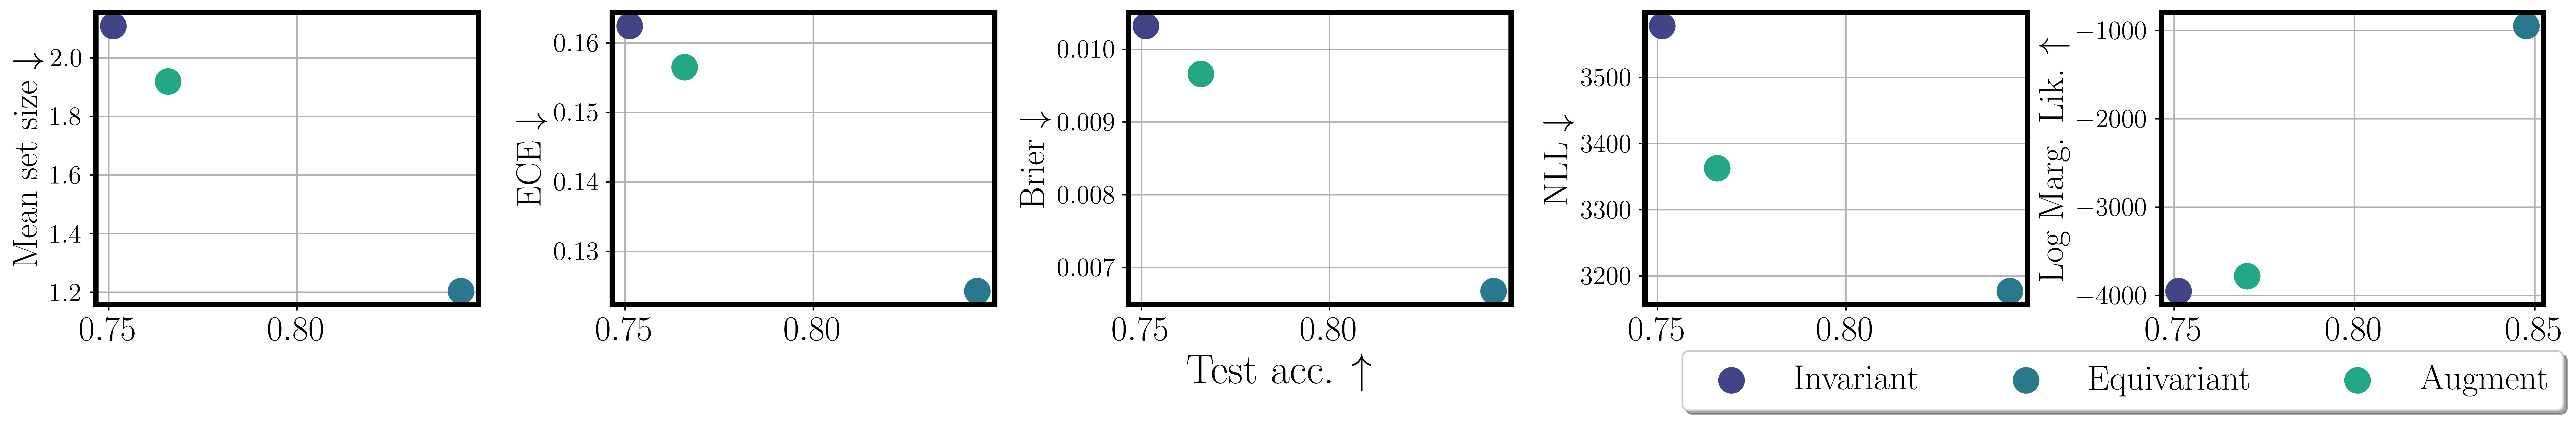

In [7]:
def plot_single_curve(data, ax, metric_key, color_idx, scatter_size, label):
    
    if metric_key == "predictive_ll":
        width = [ - data[metric_key]]
        metric = [data["test_acc"]], 
    else:        
        metric, width = [data["test_acc"]], [data[metric_key]]
    

    # ax[i].plot([metric[0], metric[0]], [width[0] - std, width[0] + std], c=colors[0], alpha=0.5)

    ax.scatter(metric, width, c=colors[color_idx], s=scatter_size, label=label)


def plot_metric(scatter_size=200, fontsize=20):
    invariant = rot_rdash1

    # non_invariant = rot_rdash2

    augmented = rot_rdash3

    equivariant = rot_rdash7

    bayes_invariant = rot_bayes_rdash1

    # bayes_non_invariant = rot_bayes_rdash2

    bayes_augmented = rot_bayes_rdash3

    bayes_equivariant = rot_bayes_rdash7


    metrics = ["width_mean", "ECE", "brier_score", "predictive_ll"]

    fig, ax = plt.subplots(1, len(metrics)+1, figsize=(5*(len(metrics)+1),3), dpi=600)
    fig.subplots_adjust(wspace=0.35)

    for i, metric_key in enumerate(metrics):
        plot_single_curve(invariant, ax[i], metric_key, 0, scatter_size, "Invariant")

        plot_single_curve(equivariant, ax[i], metric_key, 1, scatter_size, "Equivariant")
        plot_single_curve(augmented, ax[i], metric_key, 2, scatter_size, "Augment")
        # plot_single_curve(non_invariant, ax[i], metric_key, 3, scatter_size, "Plain")

        ax[i].grid()
        ax[i].tick_params(axis='y', labelsize=15) 
        if i == 0:
            ax[i].set_ylabel(r"Log Marginal Likelihood $(\uparrow)$", fontsize=fontsize)#, rotation="horizontal")

        ax[i].set_axisbelow(True)        
        ax[i].set_ylabel(f"{metric2title[metric_key]} "+ r"$\downarrow$", fontsize=fontsize)
       

    
    # LL
    # metric_key = "post_train_log_likelihood"
    # plot_single_curve(bayes_equivariant, ax[3], metric_key, 0, scatter_size, "Equivariant")
    # plot_single_curve(bayes_invariant, ax[3], metric_key, 1, scatter_size, "Invariant")
    # plot_single_curve(bayes_augmented, ax[3], metric_key, 2, scatter_size, "Augment")
    # plot_single_curve(bayes_non_invariant, ax[3], metric_key, 3, scatter_size, "Plain")
    # ax[3].grid()
    # ax[3].tick_params(axis='y', labelsize=15) 

    # ax[3].set_axisbelow(True)        
    # ax[3].set_ylabel(f"{metric2title[metric_key]} "+ r" (Bayes) $\uparrow$", fontsize=fontsize)
    
    # LL
    metric_key = "post_log_marginal_likelihood"
    plot_single_curve(bayes_invariant, ax[4], metric_key, 0, scatter_size, "Invariant")

    plot_single_curve(bayes_equivariant, ax[4], metric_key, 1, scatter_size, "Equivariant")
    plot_single_curve(bayes_augmented, ax[4], metric_key, 2, scatter_size, "Augment")
    # plot_single_curve(bayes_non_invariant, ax[4], metric_key, 3, scatter_size, "Plain")
    ax[4].grid()
    ax[4].tick_params(axis='y', labelsize=15) 

    ax[4].set_axisbelow(True)        
    ax[4].set_ylabel(f"{metric2title[metric_key]} "+ r"$\uparrow$", fontsize=fontsize)

    
    fig.supxlabel(r"Test acc. $\uparrow$", y=-0.12)    
    # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=fontsize)
    # Add a shared legend below all subplots
    # Put a legend below current axis
    plt.legend(
        loc='upper center', 
        # bbox_to_anchor=(-0.9, -0.27),
        bbox_to_anchor=(-0.1, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=4
    )

plot_metric()


<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8340/3326728723.py:30: SyntaxWarning: invalid escape sequence '\d'
  ax[i].set_ylabel(f"{metric2title[metric_key]} $\downarrow$", fontsize=fontsize)
/tmp/ipykernel_8340/4035621598.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(metric, width, c=colors[color_idx], s=scatter_size, label=label)


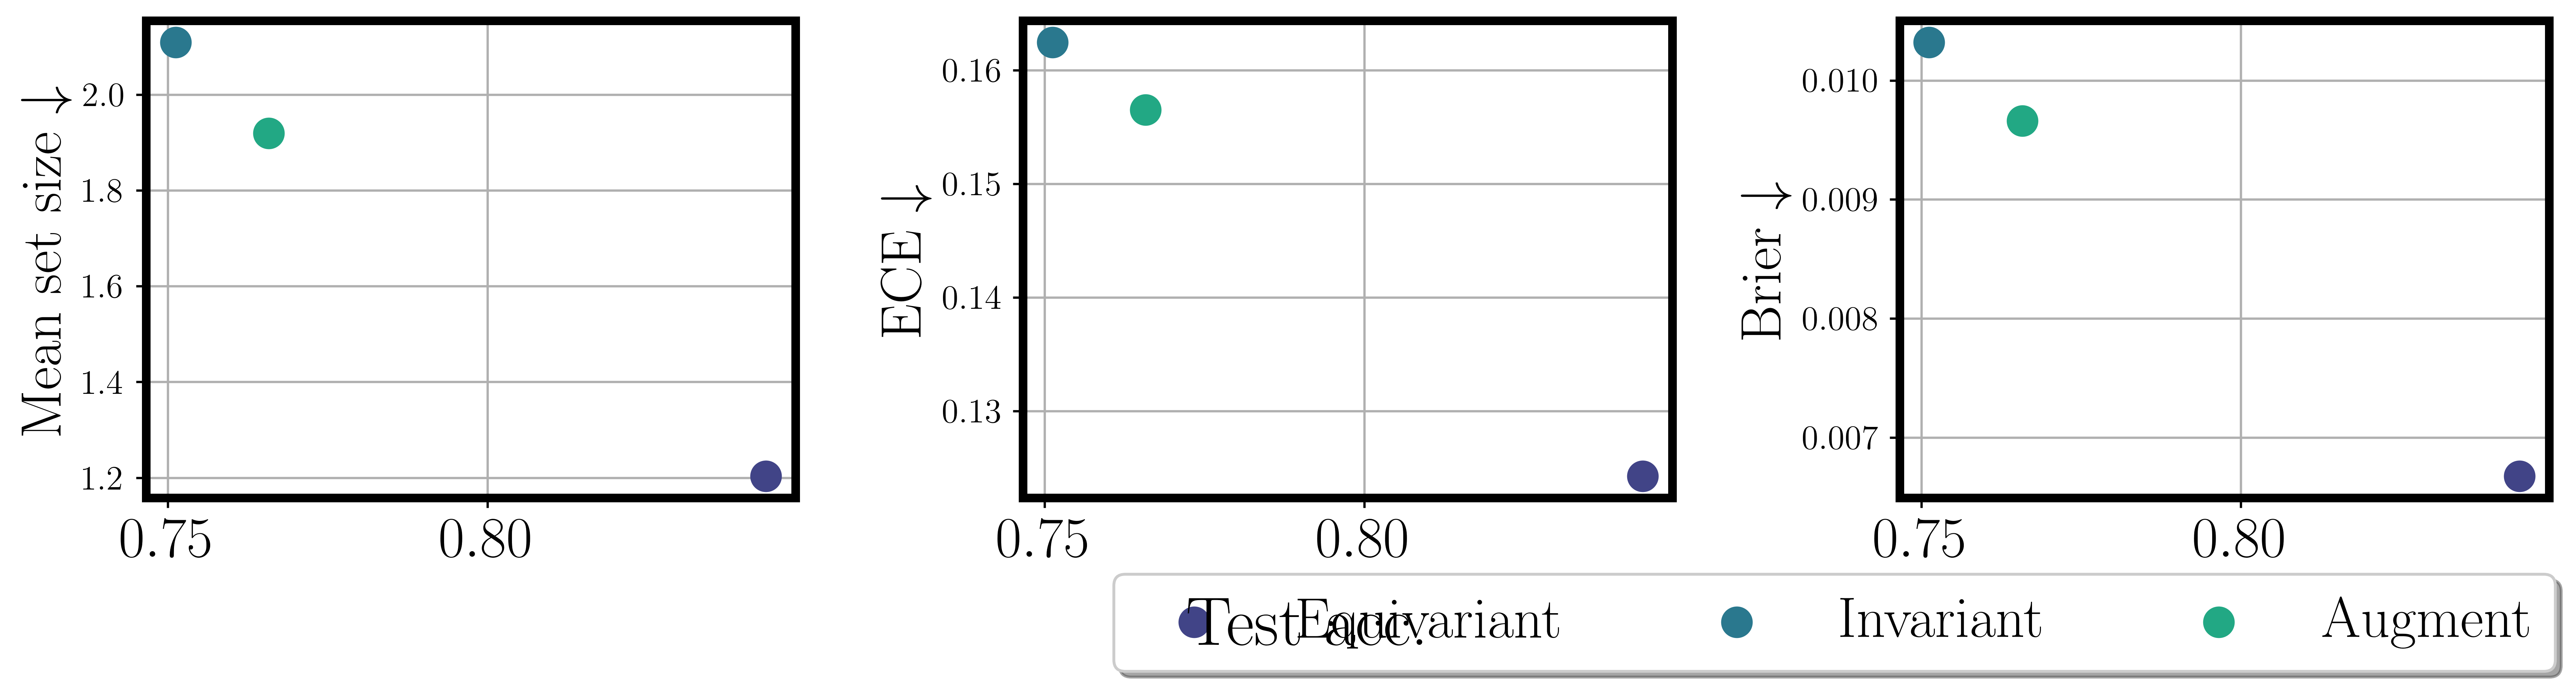

In [63]:

def plot_metric_rotated(scatter_size=100, fontsize=20):
    invariant = rot_rdash1

    # non_invariant = rot_rdash2

    augmented = rot_rdash3

    equivariant = rot_rdash7
    

    metrics = ["width_mean", "ECE", "brier_score"]

    fig, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics),3), dpi=600)
    fig.subplots_adjust(wspace=0.35)

    for i, metric_key in enumerate(metrics):
        
        plot_single_curve(equivariant, ax[i], metric_key, 0, scatter_size, "Equivariant")
        plot_single_curve(invariant, ax[i], metric_key, 1, scatter_size, "Invariant")
        plot_single_curve(augmented, ax[i], metric_key, 2, scatter_size, "Augment")
        # plot_single_curve(non_invariant, ax[i], metric_key, 3, scatter_size, "Plain")

        ax[i].grid()
        
        if i == 0:
            ax[i].set_ylabel(r"Log Marginal Likelihood $(\uparrow)$", fontsize=fontsize)#, rotation="horizontal")

        ax[i].tick_params(axis='y', labelsize=12) 
        ax[i].set_axisbelow(True)        
        ax[i].set_ylabel(f"{metric2title[metric_key]} $\downarrow$", fontsize=fontsize)
    # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=fontsize)
    # plt.suptitle(r"Test Acc.", y=0, fontsize=fontsize)
    fig.supxlabel("Test acc.", y=-0.15)    
    # plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=fontsize)
    # Add a shared legend below all subplots
    # Put a legend below current axis
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(-0.1, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=3
    )

plot_metric_rotated()
